## Matplotlib Homework Description

Pymaceuticals specializes in drug-based, anti-cancer pharmaceuticals. In their most recent efforts, 
they've since begun screening for potential treatments to squamous cell carcinoma (SCC), a commonly 
occurring form of skin cancer.

As their Chief Data Analyst, you've been given access to the complete data from their most recent 
animal study. In this study, 250 mice were treated through a variety of drug regimes over the course
of 45 days. Their physiological responses were then monitored over the course of that time. Your 
objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, 
and Placebo) compare.

To do this you are tasked with:

- Creating a scatter plot that shows how the tumor volume changes over time for each treatment.
- Creating a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for each treatment.
- Creating a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate)
- Creating a bar graph that compares the total % tumor volume change for each drug across the full 45 days.

## Pymaceuticals Inc. Matplotlib Homework #5
#### By: Mike Suomi 6/10/2018
- Observed Trend 1:
- Observed Trend 2:
- Observed Trend 3:

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import sem, ttest_ind

In [237]:
#import raw data - make sure files are saved in raw_data subfolder
path = "raw_data\\"
file1 = "clinicaltrial_data.csv"
file2 = "mouse_drug_data.csv"
file1_path = "{}{}".format(path, file1)
file2_path = "{}{}".format(path, file2)

df_clinicaltrial = pd.read_csv(file1_path)
df_mousedata = pd.read_csv(file2_path)

In [238]:
print(df_clinicaltrial.shape)
print(len(df_clinicaltrial['Mouse ID'].unique()))
df_clinicaltrial.head()

(1893, 4)
249


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [239]:
print(df_mousedata.shape)
print(len(df_mousedata['Mouse ID'].unique()))
df_mousedata.head()

(250, 2)
249


,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [240]:
#why is the unique number of Mouse IDs less than than the the number of rows in mousedata? 
df_mousedata['Mouse ID'].value_counts().head()

g989    2
u327    1
l872    1
s710    1
r107    1
Name: Mouse ID, dtype: int64

In [241]:
df_mousedata[df_mousedata['Mouse ID'] == 'g989'] #how did one mouse get two drugs in the trial?-seems like an error

,Mouse ID,Drug
7,g989,Stelasyn
173,g989,Propriva


In [242]:
df_clinicaltrial[df_clinicaltrial['Mouse ID'] == 'g989'] #this is a labeling error by lab

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,0,45.000000,0
137,g989,0,45.000000,0
329,g989,5,48.786801,0
360,g989,5,47.570392,0
620,g989,10,51.745156,0
681,g989,10,49.880528,0
815,g989,15,51.325852,1
869,g989,15,53.442020,0
950,g989,20,55.326122,1
1111,g989,20,54.657650,1


In [243]:
#remove the error mouse ID of g989 from drug database before more merging
df_mousedata = df_mousedata[df_mousedata['Mouse ID'] != 'g989']

df_mousedata['Mouse ID'].value_counts().head()

u327    1
y260    1
a963    1
s710    1
r107    1
Name: Mouse ID, dtype: int64

In [244]:
#investigate clinical trial datapoints per mouse
df_clinicaltrial['Mouse ID'].value_counts()

g989    13
u327    10
e476    10
a897    10
n304    10
p438    10
t724    10
f545    10
m546    10
y163    10
k483    10
l509    10
r944    10
t718    10
s565    10
c264    10
o926    10
a963    10
s710    10
o331    10
m550    10
w151    10
q633    10
i738    10
q597    10
g497    10
k862    10
b128    10
m650    10
a411    10
        ..
w150     3
x209     3
a457     3
w746     2
n630     2
w678     2
o813     2
z234     2
h531     2
m756     2
z314     2
f278     2
s619     2
c326     2
f394     2
y601     2
v339     2
w140     2
x226     1
f932     1
x336     1
n482     1
u153     1
h428     1
b447     1
l872     1
t573     1
d133     1
o848     1
v199     1
Name: Mouse ID, Length: 249, dtype: int64

In [245]:
df_clinicaltrial['Timepoint'].max()

45

In [246]:
######they want us to keep in the mice that died for later reference, so don't remove this stuff
# #seems like many mice aren't lasting the full testing regime as they have less than 10 time data
# #points recorded - try to figure out how many exactly
# print("total number of mice in study =", len(df_clinicaltrial['Mouse ID'].unique()))
# mice_incomplete_data = df_clinicaltrial['Mouse ID'].value_counts().reset_index()
# mice_incomplete_data.rename(columns={'index': 'Mouse ID', 'Mouse ID': 'Timepoint Count'}, inplace=True)
# mice_incomplete_data = mice_incomplete_data[mice_incomplete_data['Timepoint Count'] < 10]
# print("number of mice that didn't last all 45 days =", len(mice_incomplete_data['Mouse ID']))
# mice_incomplete_data.head()

In [247]:
# ######they want us to keep in the mice that died for later reference, so don't remove this stuff
# #remove the number of mice that didn't last all 45 days from mousedata as that doesn't seem
# #like legitimate research if they count for data at beginning but not end
# #remove from mousedata dataframe and then when merge won't be included
# df_mousedata = df_mousedata[~df_mousedata['Mouse ID'].isin(mice_incomplete_data['Mouse ID'])]
# print("total number of mice with full time data, correctly labeled =", len(df_mousedata['Mouse ID']))
# df_mousedata.head()

In [248]:
df_mousedata['Drug'].value_counts() #we will only be looking at Capomulin, Infubinol, Ketrapil, Placebo

Ceftamin     25
Ketapril     25
Ramicane     25
Naftisol     25
Infubinol    25
Capomulin    25
Placebo      25
Zoniferol    25
Propriva     24
Stelasyn     24
Name: Drug, dtype: int64

In [249]:
# ####apparently based on output they want us to keep all data, just graph certain ones
# #remove the drugs that we are not analyzing before merging
# df_mousedata = df_mousedata[df_mousedata['Drug'].isin(
#                                                 ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])]

# df_mousedata['Drug'].value_counts()

In [250]:
#merge data by inner so that the deleted mousedata g989 that was an error doesn't get included
#also prevents extra drug data from getting entered and any potential mouse id's with unassigned drug
df = pd.merge(df_mousedata, df_clinicaltrial, how='inner', on='Mouse ID')
print(df.shape)
df.head()

(1880, 5)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


### Tumor Volume Response Over Time
Create a scatter plot that shows how the tumor volume changes over time for Capomulin, Infubinol, Ketapril, and Placebo.

In [251]:
#get the mean Tumor volume and number of metastitic sites by each drug for each timpeoint
drug_averages = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)', 'Metastatic Sites'].mean()
drug_averages.head(10)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                   45.000000          0.000000
          5                   44.266086          0.160000
          10                  43.084291          0.320000
          15                  42.064317          0.375000
          20                  40.716325          0.652174
          25                  39.939528          0.818182
          30                  38.769339          1.090909
          35                  37.816839          1.181818
          40                  36.958001          1.380952
          45                  36.236114          1.476190

In [252]:
#get the standard error of the mean Tumor volume and number of metastitic sites by each drug for each timpeoint
drug_sems = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)', 'Metastatic Sites'].sem()
drug_sems.head(10)

Tumor Volume (mm3)  Metastatic Sites
Drug      Timepoint                                      
Capomulin 0                    0.000000          0.000000
          5                    0.448593          0.074833
          10                   0.702684          0.125433
          15                   0.838617          0.132048
          20                   0.909731          0.161621
          25                   0.881642          0.181818
          30                   0.934460          0.172944
          35                   1.052241          0.169496
          40                   1.223608          0.175610
          45                   1.223977          0.202591

In [253]:
#create dataframe with just average tumor volume for each drug for each timepoint
drug_average_volume = drug_averages['Tumor Volume (mm3)'].unstack(level=-2)
drug_average_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [254]:
#create dataframe with just standard error of the means for tumor volume for each drug for each timepoint
drug_sem_volume = drug_sems['Tumor Volume (mm3)'].unstack(level=-2)
drug_sem_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


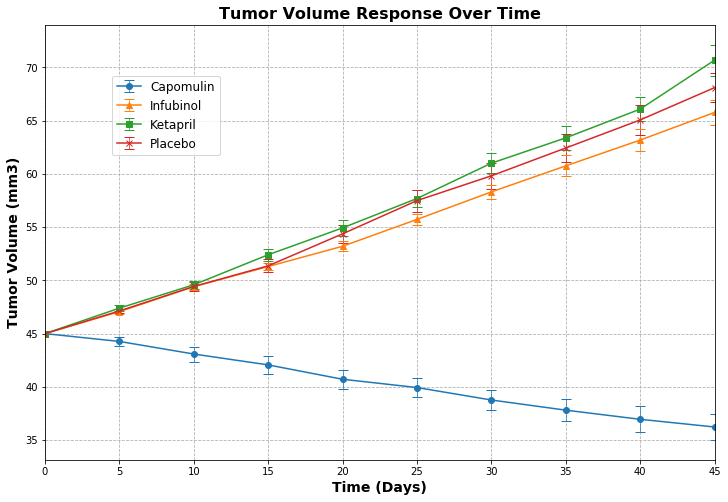

In [255]:
#Plot only the Capomulin, Infubinol, Ketapril, and Placebo values
plt.figure(figsize=(12,8))

plt.errorbar(drug_average_volume.index, drug_average_volume.Capomulin, label='Capomulin', marker='o', 
            yerr=drug_sem_volume.Capomulin, capsize=5, elinewidth=0.7)
plt.errorbar(drug_average_volume.index, drug_average_volume.Infubinol, label='Infubinol', marker='^',
            yerr=drug_sem_volume.Infubinol, capsize=5, elinewidth=0.7)
plt.errorbar(drug_average_volume.index, drug_average_volume.Ketapril, label='Ketapril', marker='s',
             yerr=drug_sem_volume.Ketapril, capsize=5, elinewidth=0.7)
plt.errorbar(drug_average_volume.index, drug_average_volume.Placebo, label='Placebo', marker='x',
             yerr=drug_sem_volume.Placebo, capsize=5, elinewidth=0.7)

plt.xlim(0,45)
#plt.ylim()

plt.xlabel('Time (Days)', size=14, fontweight='semibold')
plt.ylabel('Tumor Volume (mm3)', size=14, fontweight='semibold')
plt.grid(linestyle='--')

plt.title('Tumor Volume Response Over Time', size=16, fontweight='bold')

plt.legend(fontsize=12, loc=(0.1,0.7));

### Number of Metastatic Sites Response Over Time
Create a scatter plot that shows how the number of metastatic (cancer spreading) sites changes over time for Capomulin, Infubinol, Ketapril, and Placebo.

In [256]:
#create dataframe with just average number of metastatic sites for each drug for each timepoint
drug_average_metsites = drug_averages['Metastatic Sites'].unstack(level=-2)
drug_average_metsites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.347826,0.120000,0.260870,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.619048,0.250000,0.523810,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.800000,0.333333,0.809524,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.947368,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.384615,0.652174,1.166667,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.666667,0.782609,1.411765,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.333333,0.952381,1.533333,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [257]:
#create dataframe with just standard error of means of metastatic sites for each drug for each timepoint
drug_sem_metsites = drug_sems['Metastatic Sites'].unstack(level=-2)
drug_sem_metsites

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.101543,0.066332,0.093618,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.108588,0.090289,0.131277,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.144749,0.115261,0.163577,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.195180,0.119430,0.222607,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.212990,0.119430,0.232210,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.284268,0.139968,0.243426,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.408248,0.145997,0.255728,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


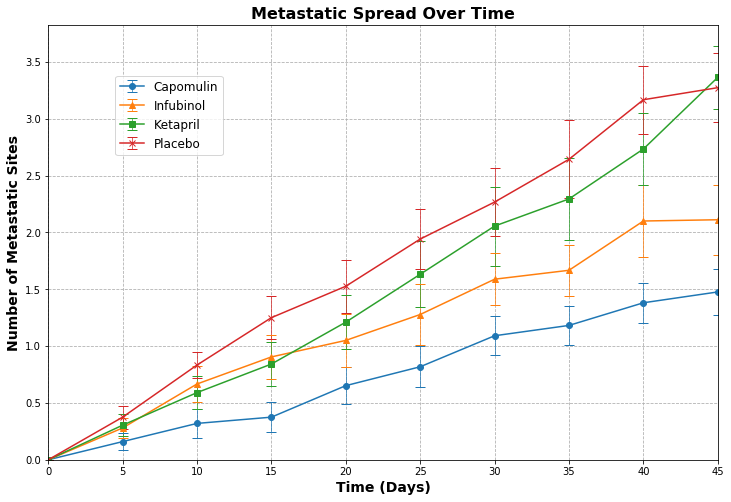

In [258]:
#Plot only the Capomulin, Infubinol, Ketapril, and Placebo values
plt.figure(figsize=(12,8))

plt.errorbar(drug_average_metsites.index, drug_average_metsites.Capomulin, label='Capomulin', marker='o', 
            yerr=drug_sem_metsites.Capomulin, capsize=5, elinewidth=0.7)
plt.errorbar(drug_average_metsites.index, drug_average_metsites.Infubinol, label='Infubinol', marker='^',
            yerr=drug_sem_metsites.Infubinol, capsize=5, elinewidth=0.7)
plt.errorbar(drug_average_metsites.index, drug_average_metsites.Ketapril, label='Ketapril', marker='s',
             yerr=drug_sem_metsites.Ketapril, capsize=5, elinewidth=0.7)
plt.errorbar(drug_average_metsites.index, drug_average_metsites.Placebo, label='Placebo', marker='x',
             yerr=drug_sem_metsites.Placebo, capsize=5, elinewidth=0.7)

plt.xlim(0,45)
plt.ylim(0)

plt.xlabel('Time (Days)', size=14, fontweight='semibold')
plt.ylabel('Number of Metastatic Sites', size=14, fontweight='semibold')
plt.grid(linestyle='--')

plt.title('Metastatic Spread Over Time', size=16, fontweight='bold')

plt.legend(fontsize=12, loc=(0.1,0.7));

### Survival Rates
Create a scatter plot that shows the number of mice still alive through the course of treatment (Survival Rate).

In [260]:
df.head(2)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0


In [268]:
# number of mice alive (counted in each trial) - excludes the one mouse who was a duplicate in two drugs and excluded from df
drug_survival = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].count()
drug_survival = drug_survival.unstack(level=-2)
drug_survival

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,24,25,24,25
5,25,21,25,23,23,24,23,25,23,24
10,25,20,21,22,21,24,21,24,21,22
15,24,19,21,19,21,20,15,24,21,21
20,23,18,20,19,20,19,15,23,19,17
25,22,18,18,19,18,17,13,23,18,16
30,22,16,17,18,15,15,12,23,17,15
35,22,14,12,17,15,14,9,21,15,14
40,21,14,10,15,15,12,9,20,12,14


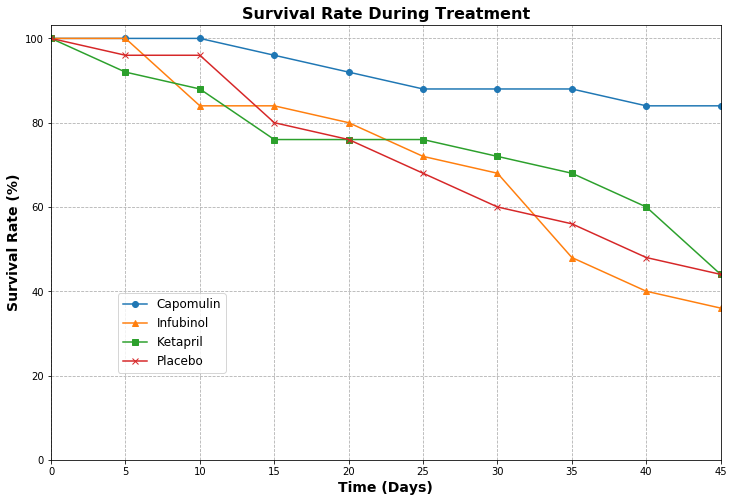

In [273]:
#Plot only the Capomulin, Infubinol, Ketapril, and Placebo values
#example, wants percentage of survival, so calculate that within as well
plt.figure(figsize=(12,8))

plt.plot(drug_survival.index, drug_survival.Capomulin/drug_survival.Capomulin[0]*100, label='Capomulin', marker='o')
plt.plot(drug_survival.index, drug_survival.Infubinol/drug_survival.Infubinol[0]*100, label='Infubinol', marker='^')
plt.plot(drug_survival.index, drug_survival.Ketapril/drug_survival.Ketapril[0]*100, label='Ketapril', marker='s')
plt.plot(drug_survival.index, drug_survival.Placebo/drug_survival.Placebo[0]*100, label='Placebo', marker='x')

plt.xlim(0,45)
plt.ylim(0)

plt.xlabel('Time (Days)', size=14, fontweight='semibold')
plt.ylabel('Survival Rate (%)', size=14, fontweight='semibold')
plt.grid(linestyle='--')

plt.title('Survival Rate During Treatment', size=16, fontweight='bold')

plt.legend(fontsize=12, loc=(0.1,0.2));

### Total % Volume Change
Create a bar graph that compares the total % tumor volume change for each drug across the full 45 days

In [274]:
df.head(2)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0


In [275]:
drug_average_volume

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [354]:
tumor_volume_change = (drug_average_volume.iloc[-1] - drug_average_volume.iloc[0]) / drug_average_volume.iloc[0] *100
tumor_volume_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [376]:
#Capomulin, Infubinol, Ketapril, and Placebo
tumor_volume_change_dict_graph = tumor_volume_change[['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']].to_dict()
print(tumor_volume_change_dict_graph)
colors_bars = ['red' if drug>=0 else 'green' for drug in tumor_volume_change_dict_graph.values()]
print(colors_bars)
print(list(tumor_volume_change_dict_graph.values())[0])

{'Capomulin': -19.475302667894173, 'Infubinol': 46.12347172785187, 'Ketapril': 57.028794686606076, 'Placebo': 51.29796048315153}
['green', 'red', 'red', 'red']
-19.475302667894173


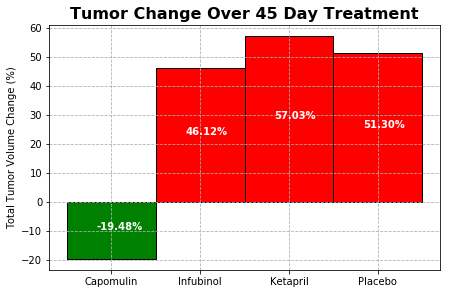

In [410]:
#Plot only the Capomulin, Infubinol, Ketapril, and Placebo values
plt.figure(figsize=(7,4.5))

#bar(x, height, width, bottom, *, align='center', **kwargs)
bars = plt.bar(tumor_volume_change_dict_graph.keys(), tumor_volume_change_dict_graph.values(), width=1.0,
           edgecolor='black', color=colors_bars, label=tumor_volume_change_dict_graph.values())

plt.ylabel('Total Tumor Volume Change (%)', size=10)
plt.grid(linestyle = '--')
plt.title('Tumor Change Over 45 Day Treatment', size=16, fontweight='bold');

#show the label of the values on the bars using the complicated plt.text by looking up each bar
#by saving the plt.bar as bars we can get the width, height, x and y locations of each bar
for bar in bars:
    xloc = bar.get_x() + bar.get_width()/3
    height = bar.get_height()
    yloc = height/2
    plt.text(xloc, yloc, '{:.2f}%'.format(height), color='w', fontweight='semibold')